In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
# Data from https://www.theatlas.com/charts/HJrdxDNKW
got_data = pd.read_csv('got_data/got_screentime.csv')
got_data.head()

,Character,Minutes
0,Jon Snow,338
1,Tyrion Lannister,337
2,Daenerys Targaryen,276
3,Sansa Stark,239
4,Cersei Lannister,236


In [5]:
# Got the 8.3 Cast list from http://time.com/5542922/game-of-thrones-season-8-battle-of-winterfell/
# Checking the data lines up
x = got_data['Character'].values
cast = ['Jon Snow','Daenerys Targaryen','Tyrion Lannister','Sansa Stark','Arya Stark',
       'Bran Stark','Theon Greyjoy','Brienne of Tarth','Jaime Lannister','Podrick Payne',
       'Gendry','Tormund','Davos Seaworth','Melisandre','Grey Worm','Missandei',
       'Eddison Tollett','Samwell Tarly','Gilly','Varys','Jorah Mormont','Lyanna Mormont',
       'Sandor Clegane','Beric Dondarrion','The Night King']
for person in cast:
    if person not in x:
        print(person)

In [6]:
def is_dead(row):
    if '*' in row['Character']:
        return True
    else:
        return False
    
def is_in_battle_of_winterfell(row):
    cast = ['Jon Snow','Daenerys Targaryen','Tyrion Lannister','Sansa Stark','Arya Stark',
           'Bran Stark','Theon Greyjoy','Brienne of Tarth','Jaime Lannister','Podrick Payne',
           'Gendry','Tormund','Davos Seaworth','Melisandre','Grey Worm','Missandei',
           'Eddison Tollett','Samwell Tarly','Gilly','Varys','Jorah Mormont','Lyanna Mormont',
           'Sandor Clegane','Beric Dondarrion','The Night King']
    if row['Character'] in cast:
        return True
    else:
        return False
    
got_data['Dead'] = got_data.apply (lambda row: is_dead(row), axis=1)
got_data['8.3'] = got_data.apply (lambda row: is_in_battle_of_winterfell(row), axis=1)
got_data.head()

,Character,Minutes,Dead,8.3
0,Jon Snow,338,False,True
1,Tyrion Lannister,337,False,True
2,Daenerys Targaryen,276,False,True
3,Sansa Stark,239,False,True
4,Cersei Lannister,236,False,False


In [7]:
dead_people = got_data[got_data.Dead == True]
dead_people.head()

,Character,Minutes,Dead,8.3
10,Petyr Baelish*,119,True,False
12,Ned Stark*,100,True,False
17,Catelyn Stark*,83,True,False
18,Tywin Lannister*,78,True,False
19,Margaery Tyrell*,78,True,False


In [8]:
with open('got_data/death_dict.pickle', 'rb') as handle:
    death_dict = pickle.load(handle)

In [9]:
# Extra death times found from https://www.businessinsider.com/game-of-thrones-everyone-who-has-died-season-7-2017-8
# and https://gameofthrones.fandom.com/wiki/
dead_x = dead_people['Character'].values

def death_episode(row):
    name = row['Character'][:-1]
    try:
        ep = death_dict[name]
    except KeyError:
        # extra dict looked up from Wiki
        # There are 45 episodes up to season 7
        # Most of these are naming conventions or season 7 deaths
        extra_death_dict = {
            'Petyr Baelish':67,
            'Ned Stark': 6,
            'Shireen Baratheon': 49,
            'Barristan Selmy':44,
            'Olenna Tyrell':63, 
            'Talisa': 29,
            'Thoros of Myr':66,
            'Maester Aemon': 47,
            'Benjen Stark': 66,
            'Tyene Sand':63,
            'Randyll Tarly': 65,
            'Qhorin Halfhand': 20,
            'Three-Eyed Raven':55,
            'Nymeria Sand':63,
            'Obara Sand':63,
            'Wun Wun':59,
            'Craster':24,
            'Brother Ray':57,
            'Septa Mordane':8,
            'Spice King':17,
            'Dagmer Cleftjaw':20,
            'Khal Moro':54,
            'Rickard Karstark':25,
            'Rattleshirt':48          
        }
        ep = extra_death_dict[name]
    return(ep)

dead_people['Ep'] = dead_people.apply (lambda row: death_episode(row), axis=1)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
dead_people['DeathValue'] = round(dead_people['Minutes']/dead_people['Ep'],3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
dead_people.head()

,Character,Minutes,Dead,8.3,Ep,DeathValue
10,Petyr Baelish*,119,True,False,67,1.776
12,Ned Stark*,100,True,False,6,16.667
17,Catelyn Stark*,83,True,False,20,4.150
18,Tywin Lannister*,78,True,False,28,2.786
19,Margaery Tyrell*,78,True,False,45,1.733


In [12]:
death_val = dead_people.groupby(['Ep'])['DeathValue'].agg('sum')

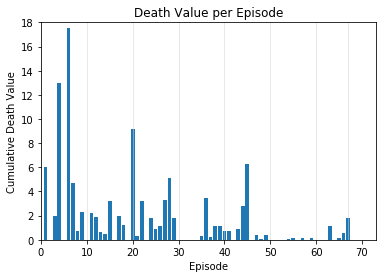

In [13]:
# Season Lines found from https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,20],color='lightgrey',linewidth=0.5)
plt.bar(death_val.index,death_val.values)
plt.ylim(top=18)
plt.xlim([0,73])
plt.title('Death Value per Episode')
plt.ylabel('Cumulative Death Value')
plt.xlabel('Episode')
plt.show()

In [15]:
# I don't think the Death Value here is reflective, because I 
# essentially make deaths N episodes in N times more shocking/valuable
# to register-- which is somewhat true but not so strict

# I mean currently the Red Wedding is half as intense as 
# Ned Stark's death. Which just isn't fair

In [27]:
dead_people['DeathValue2'] = round(
    (dead_people['Minutes']+2*dead_people['Ep'])
    /dead_people['Ep'],3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
dead_people.head()

,Character,Minutes,Dead,8.3,Ep,DeathValue,DeathValue2
10,Petyr Baelish*,119,True,False,67,1.776,3.776
12,Ned Stark*,100,True,False,6,16.667,18.667
17,Catelyn Stark*,83,True,False,20,4.150,6.150
18,Tywin Lannister*,78,True,False,28,2.786,4.786
19,Margaery Tyrell*,78,True,False,45,1.733,3.733


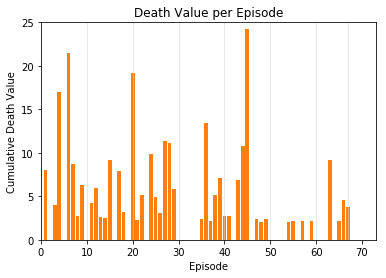

In [31]:
death_val2 = dead_people.groupby(['Ep'])['DeathValue2'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(death_val.index,death_val.values, label='DeathValue1')
plt.bar(death_val2.index,death_val2.values, label='DeathValue2')
plt.ylim(top=25)
plt.xlim([0,73])
plt.title('Death Value per Episode')
plt.ylabel('Cumulative Death Value')
plt.xlabel('Episode')
plt.show()

In [37]:
dead_people[dead_people.Ep > 40][dead_people.Ep < 50]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Character,Minutes,Dead,8.3,Ep,DeathValue,DeathValue2
19,Margaery Tyrell*,78,True,False,45,1.733,3.733
25,Ramsay Bolton*,66,True,False,44,1.500,3.500
34,Tommen Baratheon*,43,True,False,45,0.956,2.956
37,High Sparrow*,38,True,False,45,0.844,2.844
38,Barristan Selmy*,37,True,False,44,0.841,2.841
39,Grand Maester Pycelle*,35,True,False,45,0.778,2.778
41,Loras Tyrell*,32,True,False,45,0.711,2.711
46,Hodor*,30,True,False,41,0.732,2.732
65,Maester Aemon*,19,True,False,47,0.404,2.404
67,Lancel Lannister*,19,True,False,45,0.422,2.422


In [14]:
# I want to add Star Wars Original Trilogy and 
# Lord of the Rings Directors Cut to the above graph
# Screentime of LoTR characters from https://www.imdb.com/list/ls036259945/
# (but actually https://www.jetpunk.com/quizzes/lord-of-the-rings-characters-by-screen-time)
# deaths were verified https://lotr.fandom.com/wiki/List_of_deaths_in_the_Lord_of_the_Rings_films
lotr_screen_time = {
    'Frodo Baggins':121,
    'Samwise Gamgee':78,
    'Aragorn':74,
    'Gandalf':71,
    'Pippin Took':50,
    'Merry Brandybuck':41,
    'Gollum':34,
    'Legolas':31,
    'Gimli':31,
    'Théoden':24, #dead
    'Boromir':20, #dead
    'Éowyn':18,
    'Arwen':15,
    'Bilbo Baggins': 13,
    'Elrond':12,
    'Faramir':12,
    'Treebeard':10,
    'Saruman':9, #dead
    'Galadriel':8,
    'Éomer':8,
    'The Witch King':7, #dead
    'Denethor':6, #dead
    'Wormtongue':5, #dead
    'Gamling':4,
    'Sauron':4 #dead
}

fellowship = 178 #https://en.wikipedia.org/wiki/The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring
towers = 179 # https://en.wikipedia.org/wiki/The_Lord_of_the_Rings:_The_Two_Towers
king = 200 # https://en.wikipedia.org/wiki/The_Lord_of_the_Rings:_The_Return_of_the_King
lotr_run_time = fellowship+towers+king
print('LOTR Run Time:',lotr_run_time)
lotr_ep_length = np.floor(lotr_run_time/73)
print('LOTR "Episode" Length:',lotr_ep_length)


# Now I'm going to have to watch LOTR to find the timestamps of all these deaths (oh no!)


LOTR Run Time: 557
LOTR "Episode" Length: 7.0


In [2]:
# https://www.digitalspy.com/movies/a861558/movie-extended-version-dvd-lord-of-the-rings-suicide-squad/


# Things that are left out of regular for extended are almost all character development, 
# but pertaining to death value:
    # Boromir + Faramir have a flashback
    # Witch King + Sauron get more screen time
    # Faramir's romance gets more screen time
    # Sauromans + Wormtounge's last scenes + deaths are in extension